In [1]:
import os
import cv2
import numpy as np
from PIL import Image

In [2]:
def get_measure(image):
    kernel = np.array([[0, 1, 1, 1, 0],
                       [1, 0, 0, 0, 1],
                       [1, 0, -12, 0, 1],
                       [1, 0, 0, 0, 1],
                       [0, 1, 1, 1, 0]])

    return cv2.filter2D(image, -1, kernel)

In [3]:
def make_stacks(path, depth_map_window=2):
    stacks = {}
    
    for image_name in os.listdir(path):
        image_path = os.path.join(path, image_name)
        image = get_measure(np.asarray(Image.open(image_path).convert('L')))
        prefix = image_name.split('_')[0]
        
        if prefix in stacks:
            stacks[prefix].append(image)
        else:
            stacks[prefix] = [image]
            
    return [int(prefix) for prefix in stacks], [np.array(stacks[prefix]) for prefix in stacks]

In [4]:
dataset_path = os.environ.get('FOCUS_STACKING_DATASET')
prefixes, stacks = make_stacks(dataset_path)

In [5]:
result_images = []

for prefix, stack in zip(prefixes, stacks):
    stack_size, height, width = stack.shape
    result_image = (stack.argmax(axis=0) / (stack_size - 1))
    result_images.append(result_image)

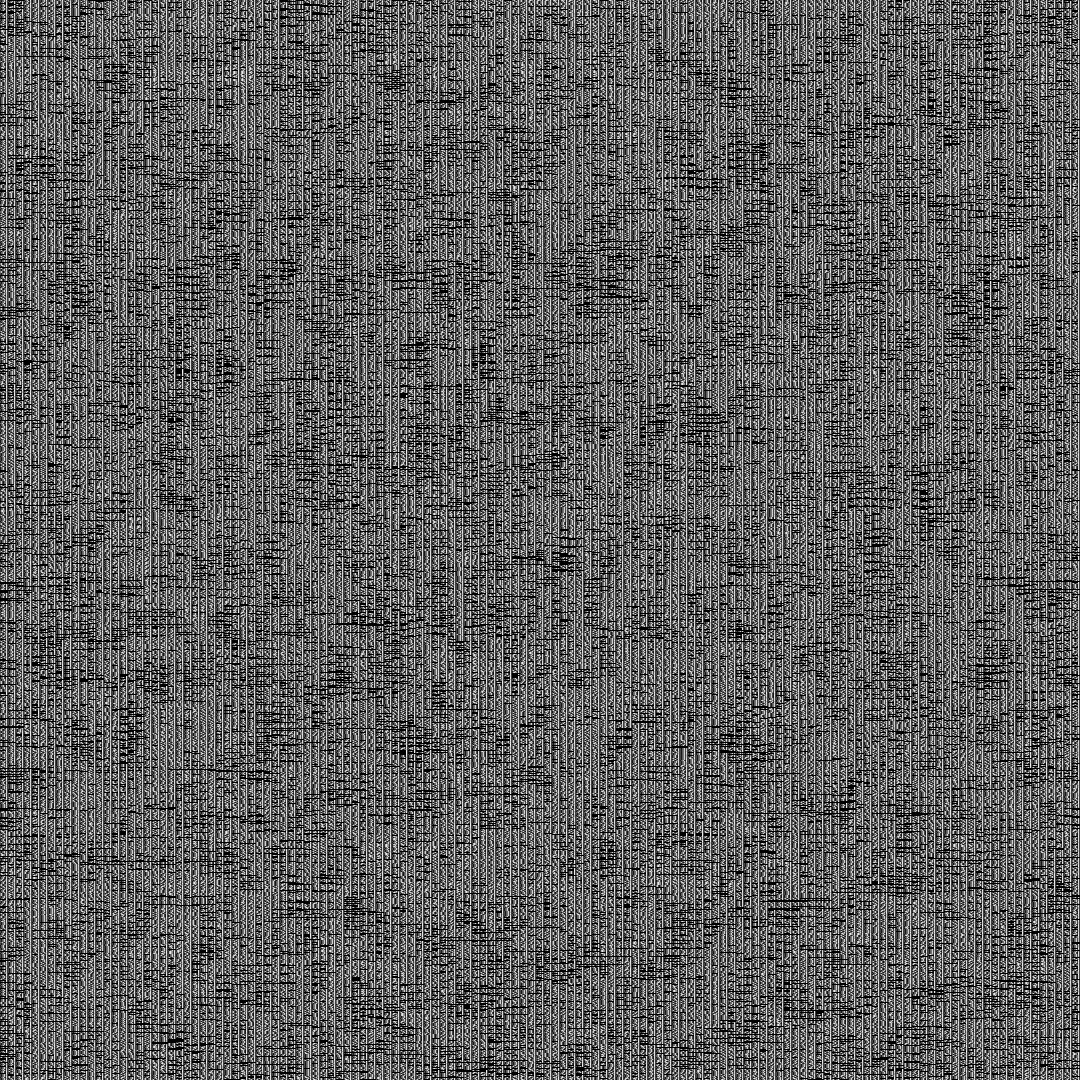

In [6]:
image = Image.fromarray(result_images[0], 'L')
image